## Tutorial 3 - Autoencoder Continued Training

In this example, we will demonstrate how a model that has been pretrained can be continued to train with new data. This is useful when you have a model that has been trained on a large dataset, and you want to fine-tune it to a new dataset. BUT, we demonstrate that this is not always a good idea.

In [1]:
import numpy as np

### Load our pretrained model

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### Load our new symbol and test the autoencoder on this new symbol

1/1 [==============================] - 0s 100ms/step
(1, 784)


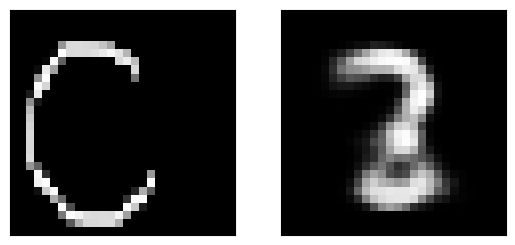

In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# load first image
image = tf.keras.utils.load_img('c1.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict the first image from its samples
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

####################################
# load second image
image2 = tf.keras.utils.load_img('c2.png', target_size=(28, 28), color_mode = "grayscale")

####################################
# predict the second image from its samples
input_arr2 = tf.keras.utils.img_to_array(image2)
input_arr2 = input_arr2/ 255 # normalize between 0 and 1
input_arr2 = input_arr2.reshape(784)
input_arr2 = np.array([input_arr2])  # Convert single image to a batch with one image in it

####################################

# load third image
image3 = tf.keras.utils.load_img('c3.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict the third image from its sample
input_arr3 = tf.keras.utils.img_to_array(image3)
input_arr3 = input_arr3/ 255 # normalize between 0 and 1
input_arr3 = input_arr3.reshape(784)
input_arr3 = np.array([input_arr3])  # Convert single image to a batch with one image in it

####################################

# load fourth image
image4 = tf.keras.utils.load_img('c4.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict the fourth image from its sample
input_arr4 = tf.keras.utils.img_to_array(image4)
input_arr4 = input_arr4/ 255 # normalize between 0 and 1
input_arr4 = input_arr4.reshape(784)
input_arr4 = np.array([input_arr4])  # Convert single image to a batch with one image in it

####################################
# load fifth image
image5 = tf.keras.utils.load_img('c5.png', target_size=(28, 28), color_mode = "grayscale")



####################################
# predict the fifth image from its sample
input_arr5 = tf.keras.utils.img_to_array(image5)
input_arr5 = input_arr5/ 255 # normalize between 0 and 1
input_arr5 = input_arr5.reshape(784)
input_arr5 = np.array([input_arr5])  # Convert single image to a batch with one image in it

########################################################################


predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can, this autoencoder doesn't do a good job with this new symbol.

### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

Let's try to retrain the original model with a mix of the new symbol and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [4]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [5]:
input_arr = input_arr.reshape(784)
input_arr2 = input_arr2.reshape(784)
input_arr3 = input_arr3.reshape(784)
input_arr4 = input_arr4.reshape(784)
input_arr5 = input_arr5.reshape(784)

np.random.shuffle(train_images)

bad_images = [input_arr for _ in range(135)]
bad_images2 = [input_arr2 for _ in range(135)]
bad_images3 = [input_arr3 for _ in range(135)]
bad_images4 = [input_arr4 for _ in range(135)]
bad_images5 = [input_arr5 for _ in range(135)]

input_arr 

new_image_set = np.vstack((train_images[:500], bad_images, bad_images2, bad_images3, bad_images4, bad_images5))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [6]:
from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
2/2 [==============================] - 1s 251ms/step - loss: 0.2340 - val_loss: 0.1910
Epoch 2/15
2/2 [==============================] - 0s 82ms/step - loss: 0.1810 - val_loss: 0.1537
Epoch 3/15
2/2 [==============================] - 0s 80ms/step - loss: 0.1482 - val_loss: 0.1400
Epoch 4/15
2/2 [==============================] - 0s 74ms/step - loss: 0.1363 - val_loss: 0.1253
Epoch 5/15
2/2 [==============================] - 0s 69ms/step - loss: 0.1223 - val_loss: 0.1162
Epoch 6/15
2/2 [==============================] - 0s 70ms/step - loss: 0.1132 - val_loss: 0.1101
Epoch 7/15
2/2 [==============================] - 0s 69ms/step - loss: 0.1062 - val_loss: 0.1034
Epoch 8/15
2/2 [==============================] - 0s 67ms/step - loss: 0.0994 - val_loss: 0.0984
Epoch 9/15
2/2 [==============================] - 0s 81ms/step - loss: 0.0935 - val_loss: 0.0947
Epoch 10/15
2/2 [==============================] - 0s 78ms/step - loss: 0.0893 - val_loss: 0.0921
Epoch 11/15
2/2 [===========

In [7]:
updated_model.save('new_updated_trained_autoencoder.h5')

### Test the model on the original test set

30/30 [==============================] - 0s 3ms/step


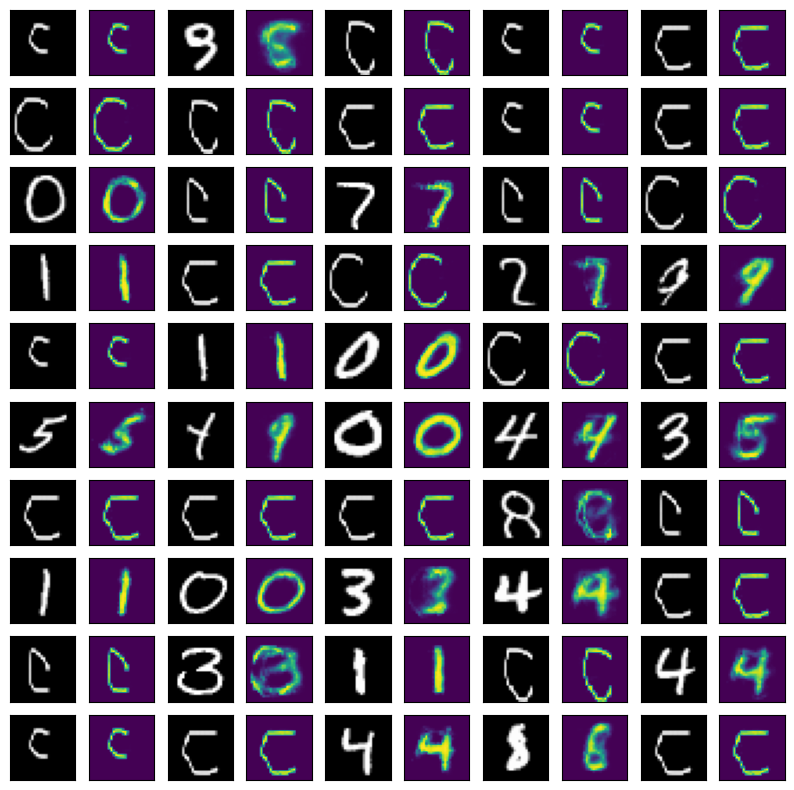

In [8]:
reconstructed_images = updated_model.predict(new_images_test)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set

1/1 [==============================] - 0s 19ms/step
(1, 784)


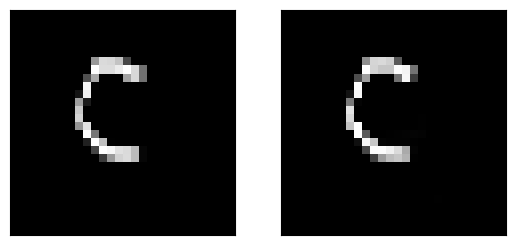

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('c5.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary 

After training the model with fresh images, it was able to correctly recognize the first letter of my name. The autoencoder model is capable of generating accurate reconstructions of different sets of digits, as shown in the preceding cells. It can also recreate the first letter of one's name. This is made possible because the autoencoder has learned how to compress input data into a lower-dimensional latent space and then reconstruct the original data from this compressed representation. In essence, the autoencoder has developed a concise and meaningful representation of the input data, which allows it to produce precise reconstructions even when the input is incomplete or damaged.

Moreover, autoencoders have various applications, such as in image compression, noise reduction, and anomaly detection. They are capable of learning representations that generalize to new, unseen data, making them useful for a wide range of tasks. For example, in the medical field, autoencoders have been used to identify anomalies in MRI scans and to segment medical images for more accurate diagnoses. In finance, they have been used for fraud detection and to detect abnormal stock price movements. Therefore, the ability of autoencoders to extract meaningful and compact representations of data has significant practical implications in various fields.